In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('ICU_filtered.csv')
data.head()
# data.fillna(data.median(), inplace=True)

,recordid,Length_of_stay,In-hospital_death,Age,Gender,Height,CCU,CSRU,SICU,DiasABP_first,...,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,WBC_first,Weight,pH_first,MechVent,UrineOutputSum
0,132539,5,0,54,0.0,NaN,0,0,1,NaN,...,137.0,NaN,NaN,221.0,NaN,11.2,NaN,NaN,0,NaN
1,132540,8,0,76,1.0,175.3,0,1,0,67.0,...,139.0,34.0,344.0,164.0,105.0,7.4,80.6,7.45,1,5.0
2,132541,19,0,44,0.0,NaN,0,0,0,81.0,...,137.0,37.0,65.0,72.0,148.0,4.2,56.7,7.51,1,14.0
3,132543,9,0,68,1.0,180.3,0,0,0,NaN,...,140.0,NaN,NaN,391.0,NaN,11.5,84.6,NaN,0,NaN
4,132545,4,0,88,0.0,NaN,0,0,0,NaN,...,140.0,NaN,NaN,109.0,NaN,3.8,NaN,NaN,0,NaN


In [20]:
df = data

In [4]:
print(data.head())
print(data.info())
print(data.describe())

   recordid  Length_of_stay  In-hospital_death  Age  Gender  Height  CCU  \
0    132539               5                  0   54     0.0     NaN    0   
1    132540               8                  0   76     1.0   175.3    0   
2    132541              19                  0   44     0.0     NaN    0   
3    132543               9                  0   68     1.0   180.3    0   
4    132545               4                  0   88     0.0     NaN    0   

   CSRU  SICU  DiasABP_first  ...  Na_first  PaCO2_first  PaO2_first  \
0     0     1            NaN  ...     137.0          NaN         NaN   
1     1     0           67.0  ...     139.0         34.0       344.0   
2     0     0           81.0  ...     137.0         37.0        65.0   
3     0     0            NaN  ...     140.0          NaN         NaN   
4     0     0            NaN  ...     140.0          NaN         NaN   

   Platelets_first  SysABP_first  WBC_first  Weight  pH_first  MechVent  \
0            221.0           NaN   

In [5]:
data.isnull().sum()

recordid                0
Length_of_stay          0
In-hospital_death       0
Age                     0
Gender                  8
Height               3747
CCU                     0
CSRU                    0
SICU                    0
DiasABP_first        2377
GCS_first             118
Glucose_first         100
HR_first              118
MAP_first            2354
NIDiasABP_first       981
NIMAP_first           984
NISysABP_first        976
Temp_first            118
BUN_first              19
Creatinine_first       19
FiO2_first           2529
HCO3_first             36
HCT_first              24
K_first                68
Lactate_first        3494
Mg_first               85
Na_first               37
PaCO2_first          1917
PaO2_first           1918
Platelets_first        28
SysABP_first         2376
WBC_first              74
Weight               2547
pH_first             1885
MechVent                0
UrineOutputSum       2907
dtype: int64

In [6]:
data.fillna(data.median(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Gender'] = data['Gender'].astype(int)

In [7]:
data.describe()

,recordid,Length_of_stay,In-hospital_death,Age,Gender,Height,CCU,CSRU,SICU,DiasABP_first,...,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,WBC_first,Weight,pH_first,MechVent,UrineOutputSum
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,...,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,142672.923028,13.795714,0.142277,64.489095,0.563530,171.992293,0.146335,0.209105,0.282272,61.985671,...,138.865204,41.096373,194.246006,214.782526,123.102206,12.955231,83.017411,7.372167,0.631372,12.476794
std,5861.405124,12.685183,0.349357,17.307736,0.495979,131.871312,0.353464,0.406695,0.450134,11.946570,...,4.733155,9.425910,108.316052,114.526088,23.558703,10.133566,20.250448,0.081262,0.482463,4.626346
min,132539.000000,1.000000,0.000000,15.000000,0.000000,121.900000,0.000000,0.000000,0.000000,2.000000,...,98.000000,11.000000,20.000000,5.000000,1.000000,1.000000,35.000000,6.750000,0.000000,1.000000
25%,137588.250000,6.000000,0.000000,53.000000,0.000000,170.200000,0.000000,0.000000,0.000000,56.000000,...,136.000000,37.000000,113.000000,141.000000,112.000000,8.500000,74.400000,7.340000,0.000000,11.000000
50%,142681.500000,10.000000,0.000000,67.000000,1.000000,170.200000,0.000000,0.000000,0.000000,61.000000,...,139.000000,40.000000,167.000000,197.000000,121.000000,11.500000,80.600000,7.380000,1.000000,13.000000
75%,147765.500000,17.000000,0.000000,78.000000,1.000000,170.200000,0.000000,0.000000,1.000000,66.000000,...,141.000000,44.000000,249.000000,265.000000,130.000000,15.600000,88.200000,7.410000,1.000000,14.000000
max,152864.000000,171.000000,1.000000,90.000000,1.000000,11220.000000,1.000000,1.000000,1.000000,141.000000,...,177.000000,99.000000,500.000000,2292.000000,263.000000,528.000000,295.000000,7.690000,1.000000,44.000000


In [8]:
X = data.drop(['recordid', 'In-hospital_death'], axis=1)
y = data['In-hospital_death']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)


In [13]:
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2030
           1       0.85      0.07      0.13       336

    accuracy                           0.87      2366
   macro avg       0.86      0.53      0.53      2366
weighted avg       0.86      0.87      0.81      2366

AUC: 0.801917663617171


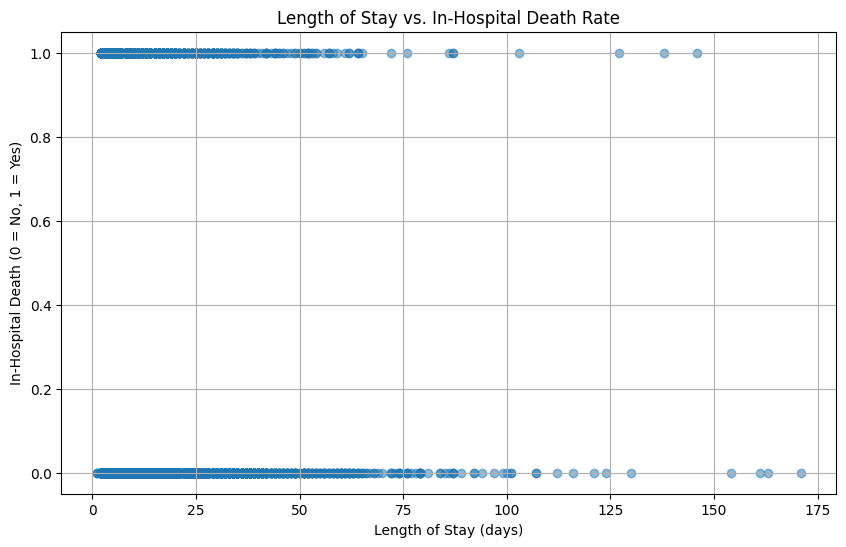

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Length_of_stay'], df['In-hospital_death'], alpha=0.5)
plt.title('Length of Stay vs. In-Hospital Death Rate')
plt.xlabel('Length of Stay (days)')
plt.ylabel('In-Hospital Death (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

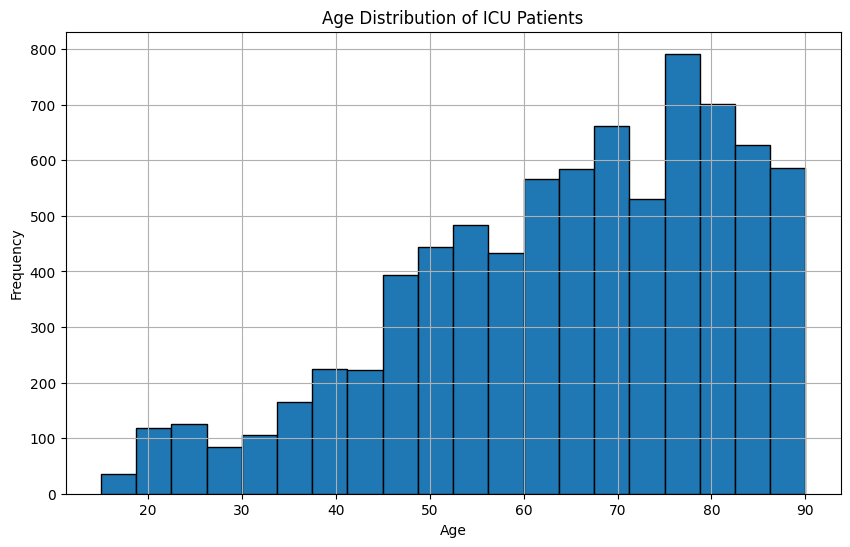

In [22]:
# Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution of ICU Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


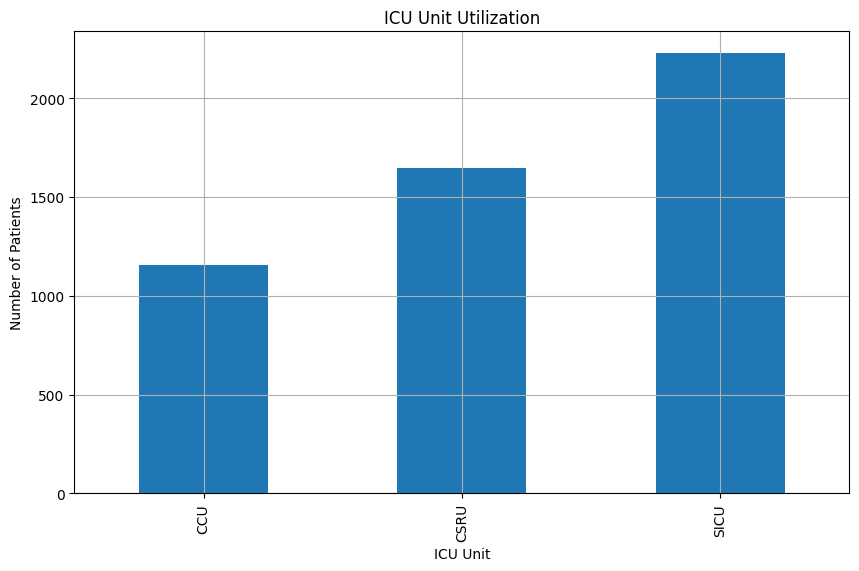

In [26]:
# Assuming CCU, CSRU, and SICU are binary columns (0 or 1)
ic_unit_counts = df[['CCU', 'CSRU', 'SICU']].sum()

plt.figure(figsize=(10, 6))
ic_unit_counts.plot(kind='bar')
plt.title('ICU Unit Utilization')
plt.xlabel('ICU Unit')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

# Measurement Distribution

### Heart rate

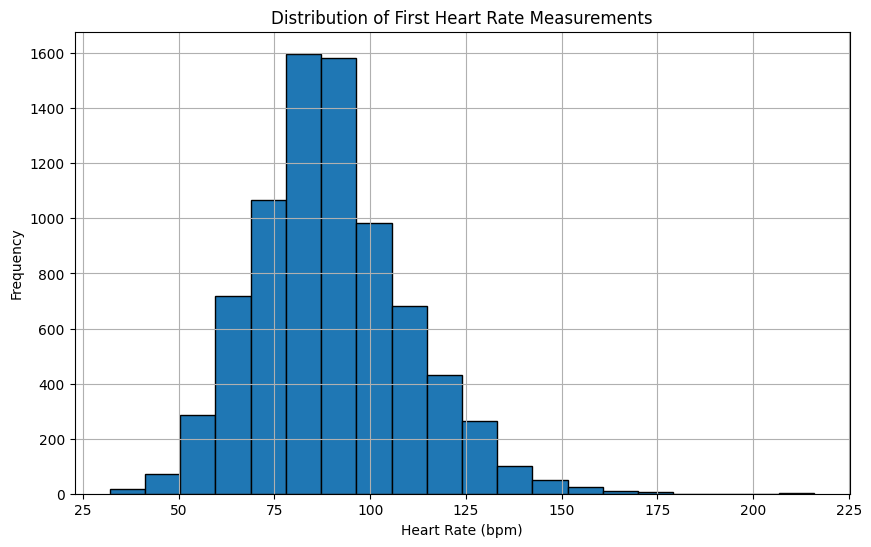

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['HR_first'], bins=20, edgecolor='black')
plt.title('Distribution of First Heart Rate Measurements')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Glucose

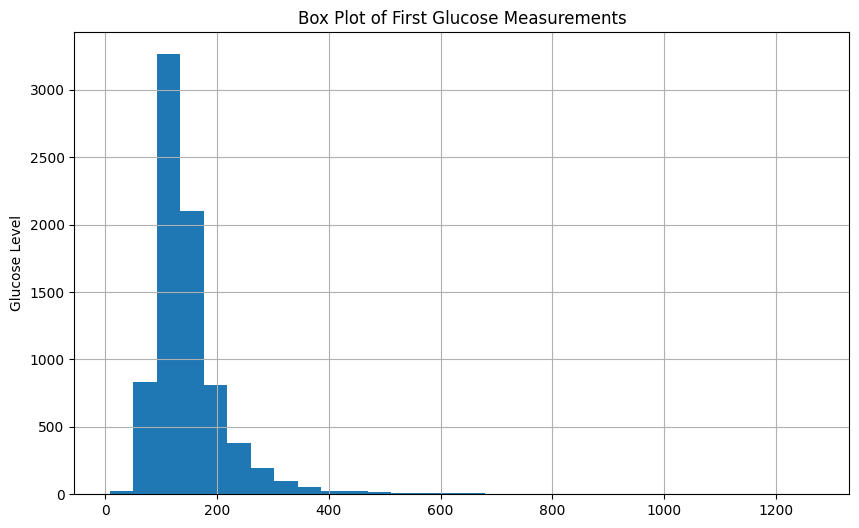

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['Glucose_first'], bins = 30)
plt.title('Box Plot of First Glucose Measurements')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.show()


### Blood Pressure

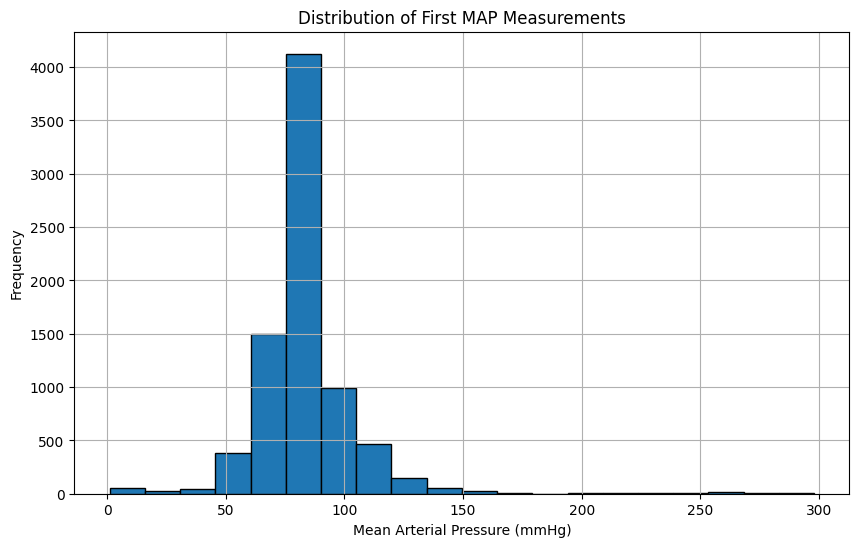

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['MAP_first'], bins=20, edgecolor='black')
plt.title('Distribution of First MAP Measurements')
plt.xlabel('Mean Arterial Pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Matrix

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 9))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of ICU Measurements')
plt.show()


### Distribution of Mechanical Ventilation Usage

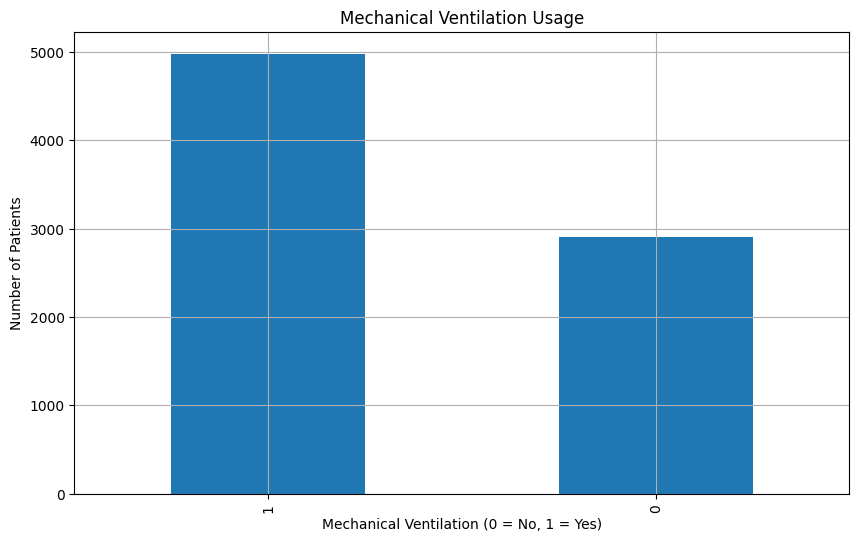

In [39]:
ventilation_counts = df['MechVent'].value_counts()

plt.figure(figsize=(10, 6))
ventilation_counts.plot(kind='bar')
plt.title('Mechanical Ventilation Usage')
plt.xlabel('Mechanical Ventilation (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()
